# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [4]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print("Male Height mean: ", male_df['Height'].mean())
print("Male Height sd: ", male_df['Height'].std())
print("Male Weight mean: ", male_df['Weight'].mean())
print("Male Weight sd: ", male_df['Weight'].std())

print("Female Height mean: ", female_df['Height'].mean())
print("Female Height sd: ", female_df['Height'].std())
print("Female Weight mean: ", female_df['Weight'].mean())
print("Female Weight sd: ", female_df['Weight'].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621741
Male Height sd:  2.863362228660651
Male Weight mean:  187.0206206581932
Male Weight sd:  19.781154516763813
Female Height mean:  63.70877360342507
Female Height sd:  2.696284015765055
Female Weight mean:  135.86009300746835
Female Weight sd:  19.02246780531901


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

In [6]:
male_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


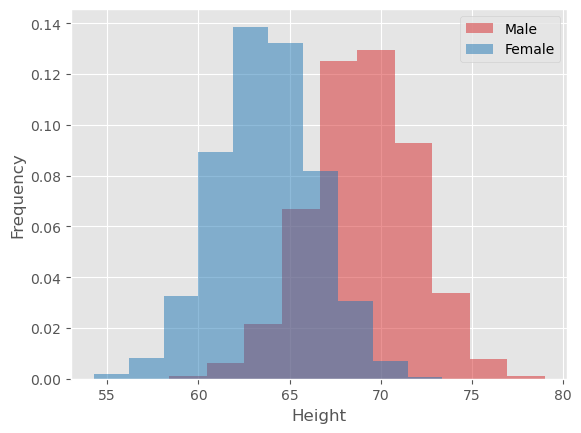

In [7]:
fig, ax = plt.subplots()

male_df['Height'].plot.hist(color='tab:red', ax=ax, alpha=0.5, label='Male', bins=10, density=1)
female_df['Height'].plot.hist(color='tab:blue', ax=ax, alpha=0.5, label='Female', bins=10, density=1)
plt.legend()
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Record your observations - are these inline with your personal observations?
"""
The heights both appear to follow a mostly normal distribution centered on their averages of 69.02 and 63.70, for Males and Females respectively.
"""

'\nThe heights both appear to follow a mostly normal distribution centered on their averages of 69.02 and 63.70, for Males and Females respectively.\n'

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

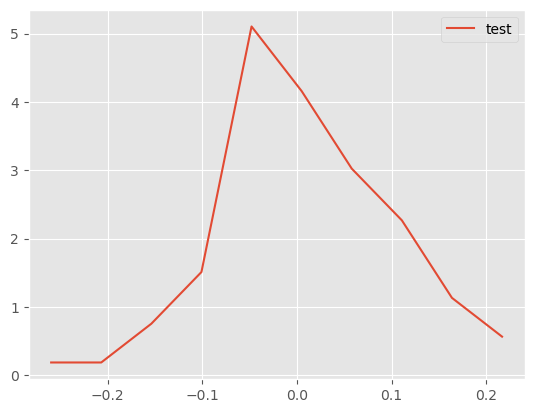

In [10]:
def density(x):
    n, bins = np.histogram(x, density=1)
    out_x = np.zeros(n.size)
    out_y = np.zeros(n.size)

    for k in range(n.size):
        out_x[k] = 0.5*(bins[k]+bins[k+1])
        out_y[k] = n[k]
    
    return out_x, out_y


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add Overlapping density plots to the histograms plotted earlier

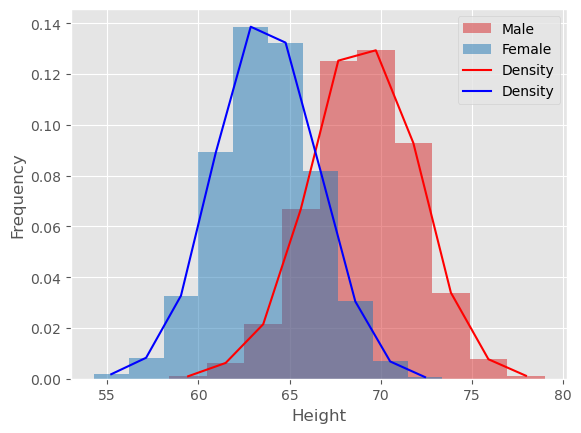

In [12]:
fig, ax = plt.subplots()

male_df['Height'].plot.hist(color='tab:red', ax=ax, alpha=0.5, label='Male', bins=10, density=1)
female_df['Height'].plot.hist(color='tab:blue', ax=ax, alpha=0.5, label='Female', bins=10, density=1)

male_x, male_y = density(male_df['Height'])
plt.plot(male_x, male_y, label = 'Density', color='red')

female_x, female_y = density(female_df['Height'])
plt.plot(female_x, female_y, label = 'Density', color='blue')

plt.legend()
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

## Repeat above exerice for male and female weights

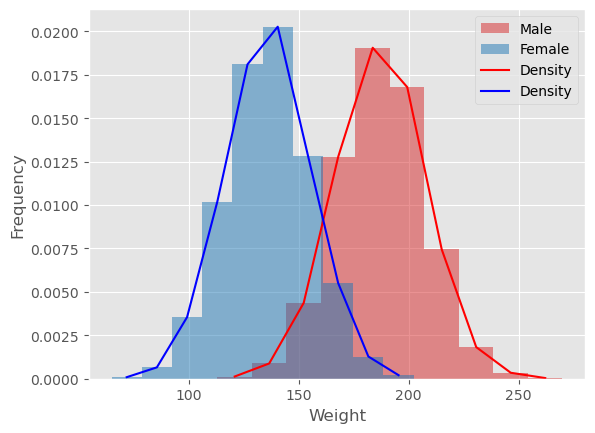

In [14]:
# Your code here 
fig, ax = plt.subplots()

male_df['Weight'].plot.hist(color='tab:red', ax=ax, alpha=0.5, label='Male', bins=10, density=1)
female_df['Weight'].plot.hist(color='tab:blue', ax=ax, alpha=0.5, label='Female', bins=10, density=1)

male_x, male_y = density(male_df['Weight'])
plt.plot(male_x, male_y, label = 'Density', color='red')

female_x, female_y = density(female_df['Weight'])
plt.plot(female_x, female_y, label = 'Density', color='blue')

plt.legend()
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

## Write your observations in the cell below

In [16]:
# Record your observations - are these inline with your personal observations?
"""
The weights both appear to follow a mostly normal distribution centered on their averages of 187.02 and 135.86, for Males and Females respectively.
"""

# What is the takeaway when comparing male and female heights and weights?
"""
Based on the data, male height and weight tend to be larger than for females
"""
male_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


## Repeat Above experiments in seaborn and compare with your results

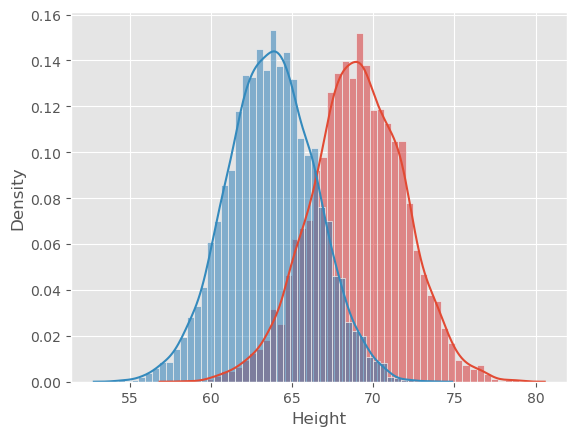

In [18]:
import seaborn as sns
fig, ax = plt.subplots()
sns.histplot(male_df['Height'],
        color='tab:red',
        alpha = 0.5,
        stat="density")
sns.histplot(female_df['Height'],
        color='tab:blue',
        alpha = 0.5,
        stat="density")

sns.kdeplot(data=male_df, 
             x='Height')

sns.kdeplot(data=female_df, 
             x='Height')
plt.show()

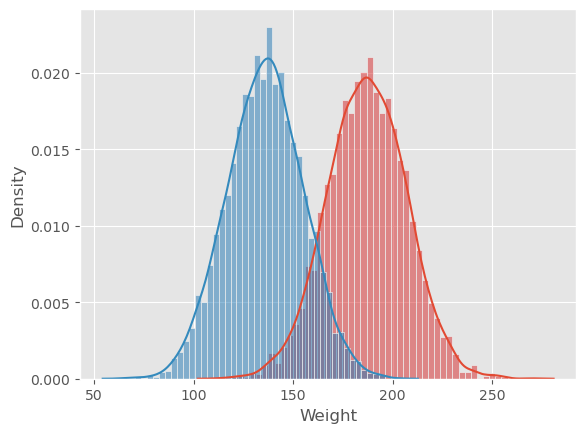

In [19]:
import seaborn as sns
fig, ax = plt.subplots()
sns.histplot(male_df['Weight'],
        color='tab:red',
        alpha = 0.5,
        stat="density")
sns.histplot(female_df['Weight'],
        color='tab:blue',
        alpha = 0.5,
        stat="density")

sns.kdeplot(data=male_df, 
             x='Weight')

sns.kdeplot(data=female_df, 
             x='Weight')
plt.show()

In [20]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
"""
Seaborn certainly streamlines the process of plotting densities, as it has a
built in function to handle it. Overall seaborn is more readable as well.
"""

'\nSeaborn certainly streamlines the process of plotting densities, as it has a\nbuilt in function to handle it. Overall seaborn is more readable as well.\n'

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.